# A Comprehensive Examination of Police Fatal Incidents and Demographic Patterns


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis 
import plotly.io as pio
import plotly.express as px
pio.renderers.default = 'iframe'
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import scipy.stats as stats
from scipy.stats import spearmanr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Loading the dataset

In [2]:
df = pd.read_excel("fatal-police-shootings-data.xls")
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7997,8690,NaN,2022-11-30,shot,vehicle,NaN,M,NaN,Mesa,AZ,False,attack,NaN,False,-111.810,33.401,True
7998,8692,NaN,2022-11-30,shot,knife,NaN,M,NaN,Mariposa County,CA,False,other,NaN,False,-119.986,37.500,True
7999,8694,NaN,2022-12-01,shot,gun,38.0,M,NaN,Tulare,CA,False,attack,NaN,False,-119.326,36.240,True
8000,8695,NaN,2022-12-01,shot,gun,NaN,M,NaN,Topeka,KS,False,other,NaN,False,-95.694,39.032,True


# Data Inspection

In [3]:
df.shape

(8002, 17)

In [4]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [5]:
df.isnull().sum()

id                            0
name                        454
date                          0
manner_of_death               0
armed                       211
age                         503
gender                       31
race                       1517
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        966
body_camera                   0
longitude                   840
latitude                    840
is_geocoding_exact            0
dtype: int64

#### We have null values in the data

In [6]:
df.duplicated().sum()

0

#### There are no duplicate values in the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       8002 non-null   int64         
 1   name                     7548 non-null   object        
 2   date                     8002 non-null   datetime64[ns]
 3   manner_of_death          8002 non-null   object        
 4   armed                    7791 non-null   object        
 5   age                      7499 non-null   float64       
 6   gender                   7971 non-null   object        
 7   race                     6485 non-null   object        
 8   city                     8002 non-null   object        
 9   state                    8002 non-null   object        
 10  signs_of_mental_illness  8002 non-null   bool          
 11  threat_level             8002 non-null   object        
 12  flee                     7036 non-

# Data cleaning

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df['d_day'] = df['date'].dt.dayofweek


In [9]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,month,day,year,d_day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,...,attack,Not fleeing,False,-123.122,47.247,True,1,2,2015,4
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,...,attack,Not fleeing,False,-122.892,45.487,True,1,2,2015,4
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,other,Not fleeing,False,-97.281,37.695,True,1,3,2015,5
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,...,attack,Not fleeing,False,-122.422,37.763,True,1,4,2015,6
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,...,attack,Not fleeing,False,-104.692,40.384,True,1,4,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7997,8690,NaN,2022-11-30,shot,vehicle,NaN,M,NaN,Mesa,AZ,...,attack,NaN,False,-111.810,33.401,True,11,30,2022,2
7998,8692,NaN,2022-11-30,shot,knife,NaN,M,NaN,Mariposa County,CA,...,other,NaN,False,-119.986,37.500,True,11,30,2022,2
7999,8694,NaN,2022-12-01,shot,gun,38.0,M,NaN,Tulare,CA,...,attack,NaN,False,-119.326,36.240,True,12,1,2022,3
8000,8695,NaN,2022-12-01,shot,gun,NaN,M,NaN,Topeka,KS,...,other,NaN,False,-95.694,39.032,True,12,1,2022,3


In [10]:
df['race'].value_counts()

W    3300
B    1766
H    1166
A     129
N     105
O      19
Name: race, dtype: int64

In [11]:
df["race"].replace({'W':'White'}, inplace = True)
df["race"].replace({'B':'Black'}, inplace = True)
df["race"].replace({'A':'Asian'}, inplace = True)
df["race"].replace({'N':'Native American'}, inplace = True)
df["race"].replace({'H':'Hispanic'}, inplace = True)
df["race"].replace({'O':'Other'}, inplace = True)


In [12]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,month,day,year,d_day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,...,attack,Not fleeing,False,-123.122,47.247,True,1,2,2015,4
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,...,attack,Not fleeing,False,-122.892,45.487,True,1,2,2015,4
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,...,other,Not fleeing,False,-97.281,37.695,True,1,3,2015,5
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,...,attack,Not fleeing,False,-122.422,37.763,True,1,4,2015,6
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,...,attack,Not fleeing,False,-104.692,40.384,True,1,4,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7997,8690,NaN,2022-11-30,shot,vehicle,NaN,M,NaN,Mesa,AZ,...,attack,NaN,False,-111.810,33.401,True,11,30,2022,2
7998,8692,NaN,2022-11-30,shot,knife,NaN,M,NaN,Mariposa County,CA,...,other,NaN,False,-119.986,37.500,True,11,30,2022,2
7999,8694,NaN,2022-12-01,shot,gun,38.0,M,NaN,Tulare,CA,...,attack,NaN,False,-119.326,36.240,True,12,1,2022,3
8000,8695,NaN,2022-12-01,shot,gun,NaN,M,NaN,Topeka,KS,...,other,NaN,False,-95.694,39.032,True,12,1,2022,3


In [13]:
df['armed'].value_counts()

gun                    4573
knife                  1142
unarmed                 460
undetermined            338
vehicle                 284
                       ... 
chainsaw                  1
gun and sword             1
claimed to be armed       1
cordless drill            1
stone                     1
Name: armed, Length: 106, dtype: int64

In [14]:
df['name'].replace({None: 'Not available '},inplace = True)
df['armed'].replace({None: 'Not defined'}, inplace = True)
df['gender'].replace({None: 'Not available'}, inplace = True)
df['flee'].replace({None: 'Not specified'}, inplace = True)
df['race'].replace({None: 'Unknown'}, inplace = True)
df['age'].fillna(df['age'].mean(), inplace = True)
df['longitude'].fillna(df['longitude'].mean(), inplace = True)
df['latitude'].fillna(df['latitude'].mean(), inplace = True)

In [15]:
df.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
longitude                  0
latitude                   0
is_geocoding_exact         0
month                      0
day                        0
year                       0
d_day                      0
dtype: int64

# Exploratory data analysis

## Analysis on State, City, Latitude and Longitude 

In [16]:
fig = px.line(df.groupby(by = 'year').count().date, title = "Shootings per year")
fig.show()

#### Here we can observe that there is a increase in shootings from the year 2016 - 2021 and there is a fall in 2022 because we dont have complete data for this year

In [17]:
fig = px.line(df.groupby(by = 'month').count().date, title = "Shootings per year")
fig.show()

#### As we can see the majority of shootings happened in the month of march and again increased in the month of june and october  

In [18]:
fig = px.line(df.groupby(by = 'day').count().date, title = "Shootings per month")
fig.show()

In [19]:
fig = px.line(df.groupby(by = 'd_day').count().date, title = "Shootings in a week")
fig.show()

## Geographical Interactive Visualization

In [20]:
cases_in_us = pd.DataFrame({'state':df.state.value_counts().index,'cases':list(df.state.value_counts())})

fig = px.choropleth(cases_in_us, locations='state', locationmode='USA-states', color='cases',
                           range_color=(cases_in_us.cases.min(),cases_in_us.cases.max()),
                           scope="usa",
                           color_continuous_scale='blues',
                           title='antani'
                          )
fig.update_layout(title='Total cases in USA', title_x=0.5)

In [21]:
df['text'] =  df['city'] + ', ' + df['state'] 

fig = go.Figure(data=go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['text'],
        mode = 'markers',
        ))
fig.update_layout(
        title = 'Incidents observed in the respective region',
        geo_scope='usa',
    )
fig.show()

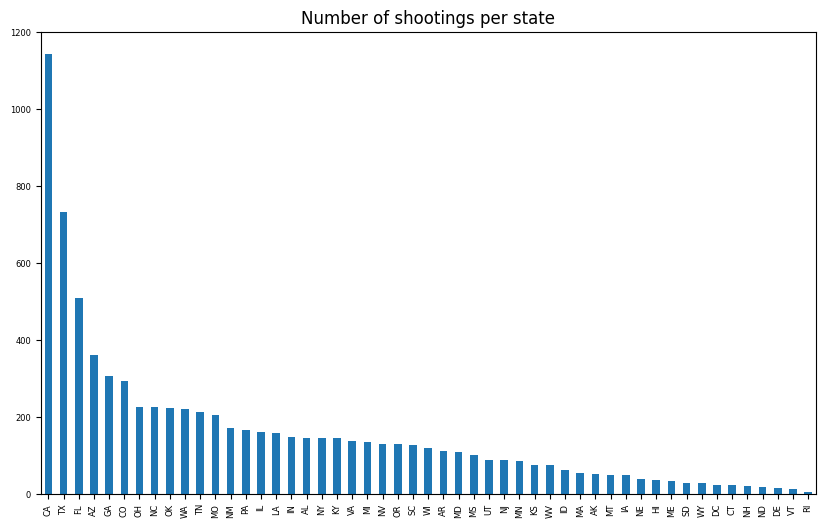

In [22]:
df['state'].value_counts().plot.bar(fontsize=6, figsize = (10,6))
plt.title("Number of shootings per state")
plt.ylabel('')
plt.show()

## Analysis on Manner of Death 

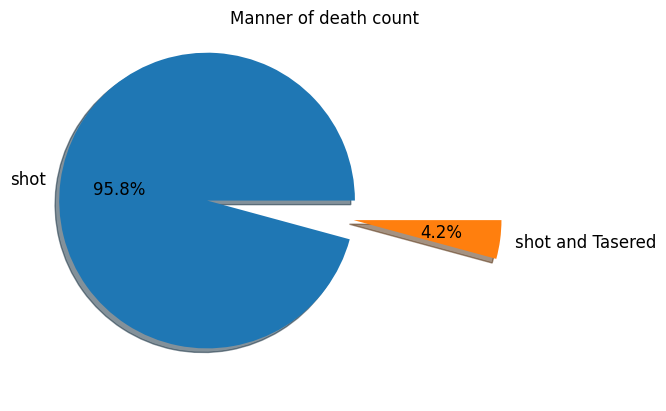

In [23]:
df['manner_of_death'].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,shadow=True,explode=[0.8,0.2])
plt.title("Manner of death count")
plt.ylabel('')
plt.show()

<Figure size 1700x600 with 0 Axes>

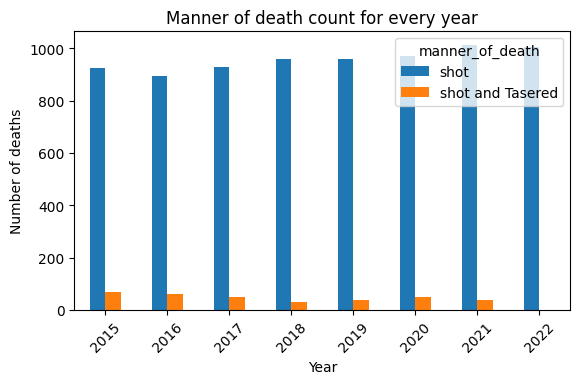

In [24]:
df_grouped = df.groupby(['year', 'manner_of_death']).size()

# Unstack the DataFrame
df_unstacked = df_grouped.unstack()

# Create a bar chart
plt.figure(figsize=(17, 6))
df_unstacked.plot(kind='bar')
plt.title('Manner of death count for every year')
plt.ylabel('Number of deaths')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.3)
plt.show()

## Analysis on Gender

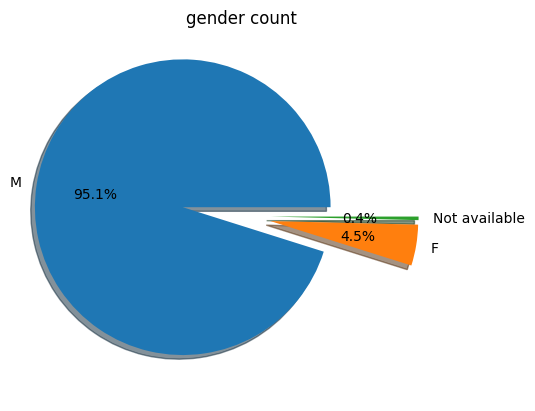

In [25]:
df['gender'].value_counts().plot.pie(autopct='%1.1f%%',fontsize=10,shadow=True,explode=[0.4,0.2,0.2])
plt.title("gender count")
plt.ylabel('')
plt.show()

## Analysis on Race Factor

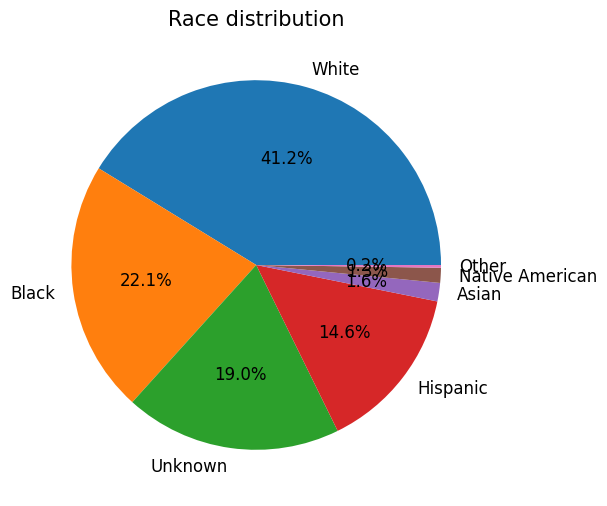

In [26]:
plt.figure(figsize=(10,6))
df.race.value_counts().plot.pie(autopct='%1.1f%%',fontsize=12)
plt.title("Race distribution",fontsize=15)
plt.ylabel('')
plt.show()

## Analysis on Age DIstribution

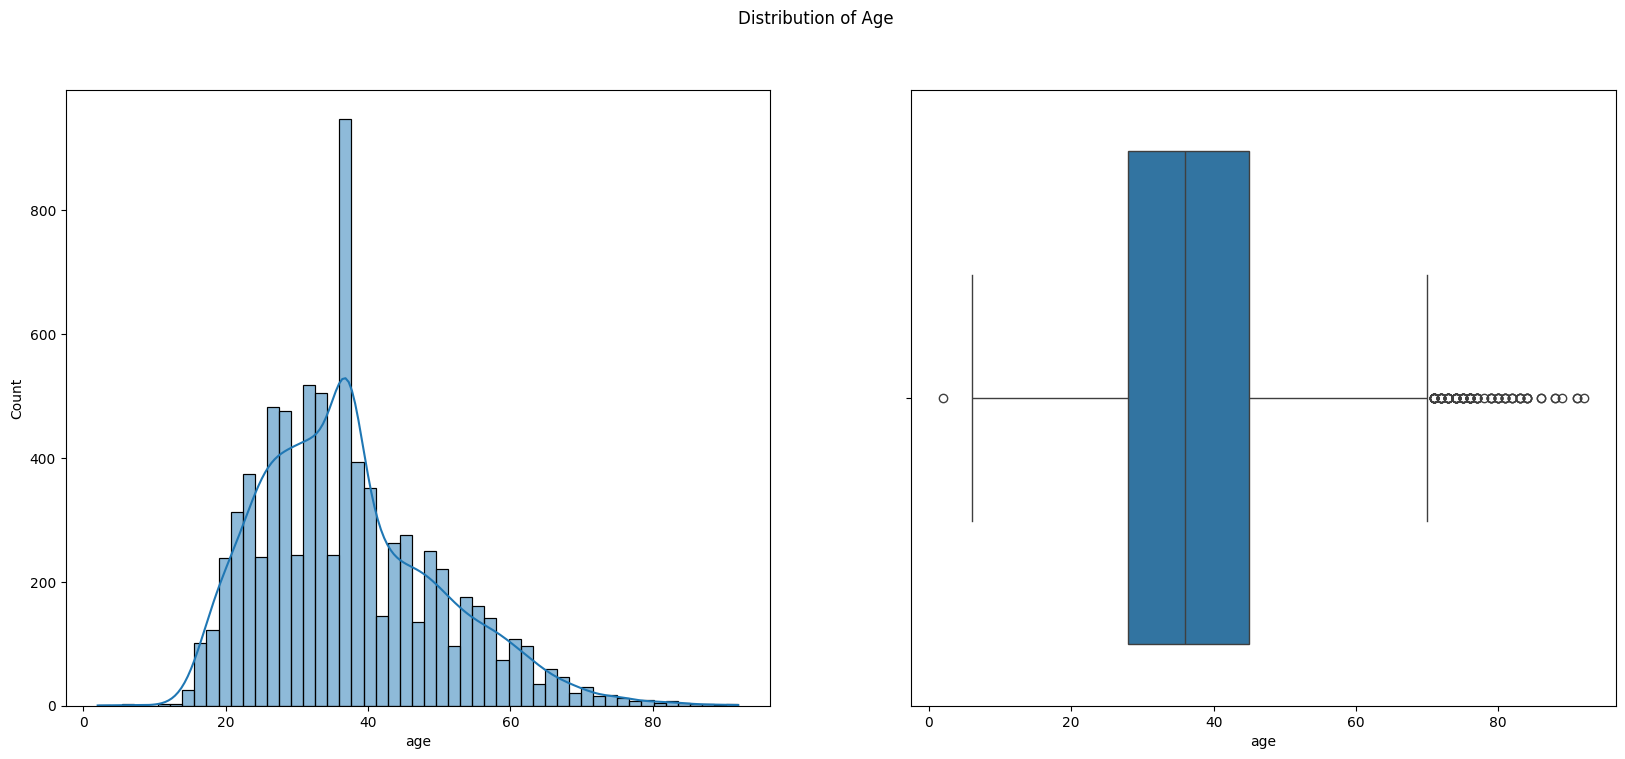

In [27]:
fig,ax = plt.subplots(1,2,figsize=(20,8))
sns.histplot(data=df,x='age',kde=True,ax=ax[0])

sns.boxplot(x=df['age'],ax=ax[1])
plt.suptitle("Distribution of Age")
plt.show()

In [28]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
bin_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50','51-55','56-60', '61-65', '66-70','71-75','76-80','81-85','86-90', '91-95','96-100']
df['age-groups'] = pd.cut(df['age'], bins, labels = bin_labels)
df['age'].describe()

count    8002.000000
mean       37.209228
std        12.564876
min         2.000000
25%        28.000000
50%        36.000000
75%        45.000000
max        92.000000
Name: age, dtype: float64

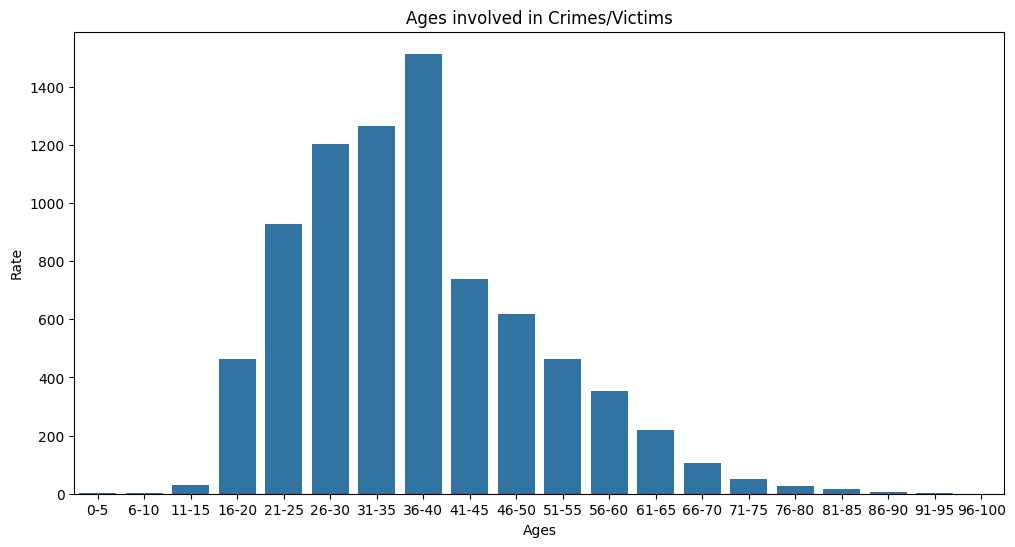

In [29]:
ages = df['age-groups'].value_counts()
plt.figure(figsize = (12,6))
sns.barplot(x = ages.index, y = ages.values)
plt.xlabel('Ages')
plt.ylabel('Rate')
plt.title('Ages involved in Crimes/Victims')
plt.show()

## Distribution of Ages based on Race Factor and Gender

C:\Users\DELL\AppData\Local\Temp\ipykernel_23596\806159648.py:2: UserWarning:

The palette list has more values (9) than needed (3), which may not be intended.



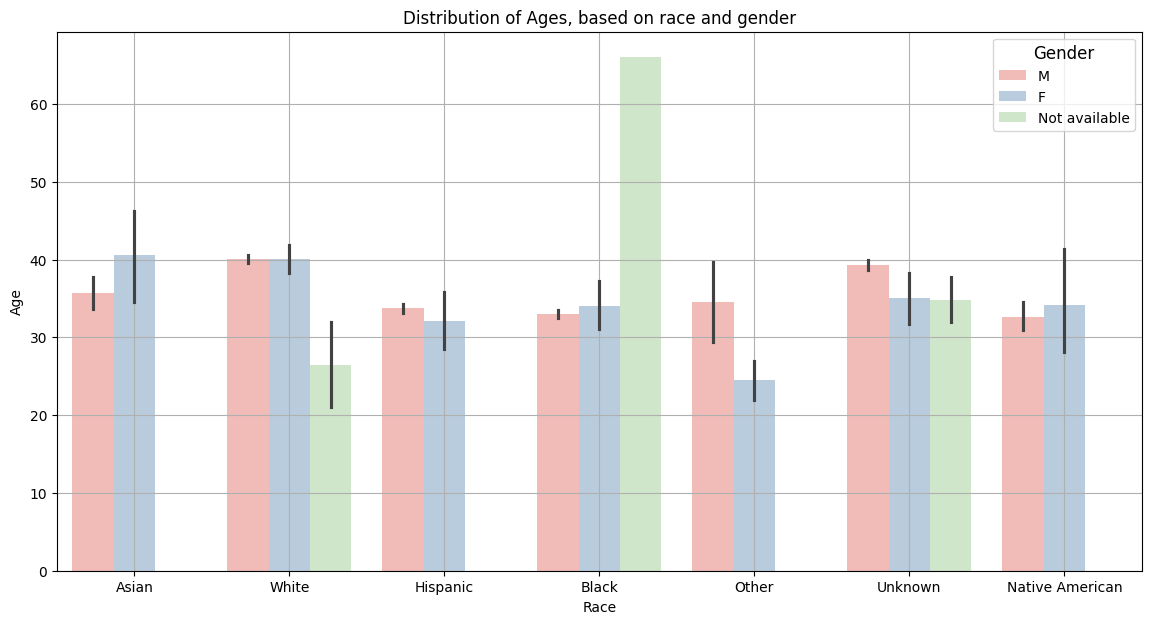

In [30]:
plt.figure(figsize=(14, 7))
sns.barplot(
    x="race",
    y="age",
    hue="gender",
    data=df,
    palette=sns.color_palette("Pastel1"),
)

# Customize the plot
plt.title("Distribution of Ages, based on race and gender")
plt.xlabel("Race")
plt.ylabel("Age")
plt.legend(title="Gender", title_fontsize=12)
plt.grid(True)
plt.show()

## Distribution of Ages, based on race and Sign of Mental Illness

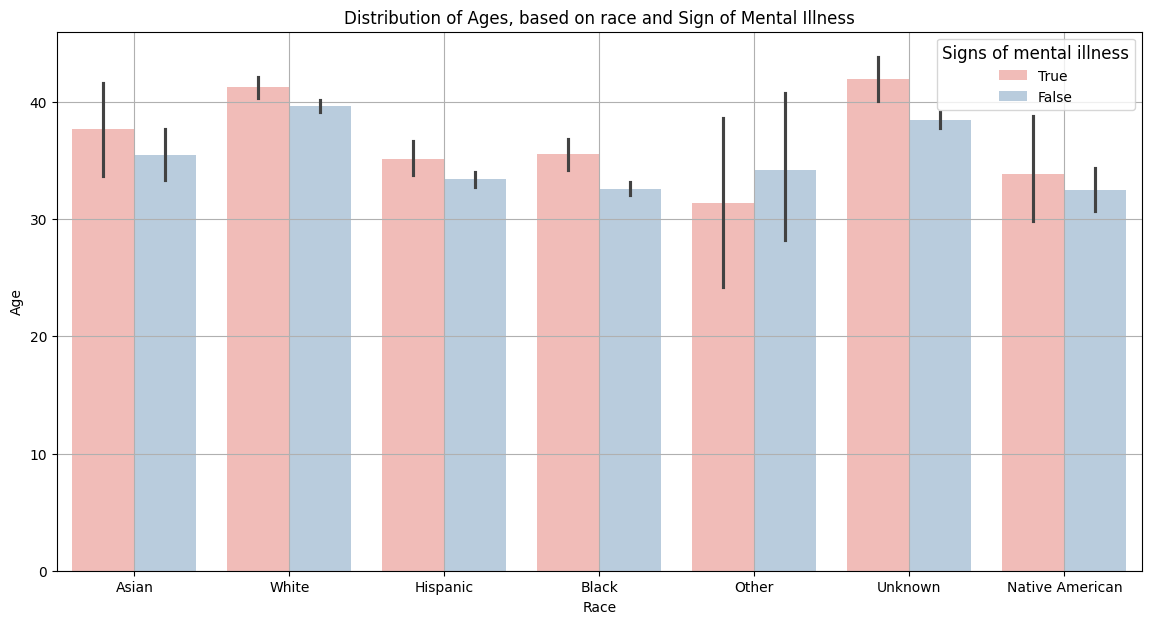

In [31]:
plt.figure(figsize=(14, 7))
sns.barplot(
    x="race",
    y="age",
    hue="signs_of_mental_illness",
    hue_order=[True, False],
    data=df,
    palette="Pastel1",
)

# Customize the plot
plt.title("Distribution of Ages, based on race and Sign of Mental Illness")
plt.xlabel("Race")
plt.ylabel("Age")
plt.legend(title="Signs of mental illness", title_fontsize=12)
plt.grid(True)
plt.show()

## Analysis on Mental Illness of the Suspect

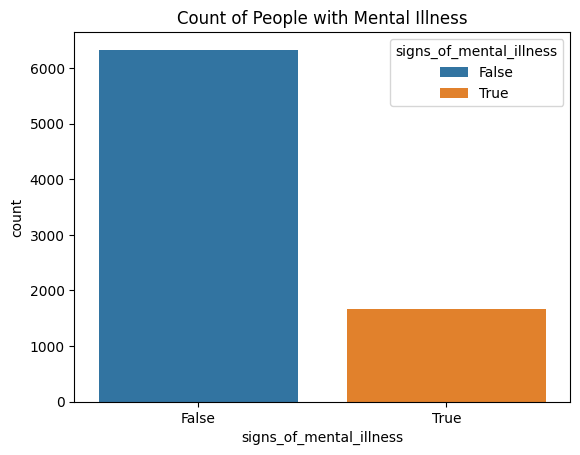

In [32]:
sns.countplot(data=df,x='signs_of_mental_illness', hue = 'signs_of_mental_illness')
plt.title("Count of People with Mental Illness")
plt.show()


## Analysis on Threat Level

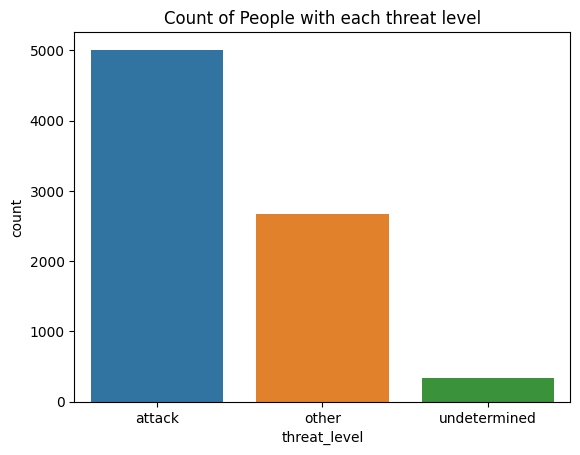

In [33]:
sns.countplot(data=df,x='threat_level', hue= 'threat_level')
plt.title("Count of People with each threat level")
plt.show()

## Analysis on Flee factor

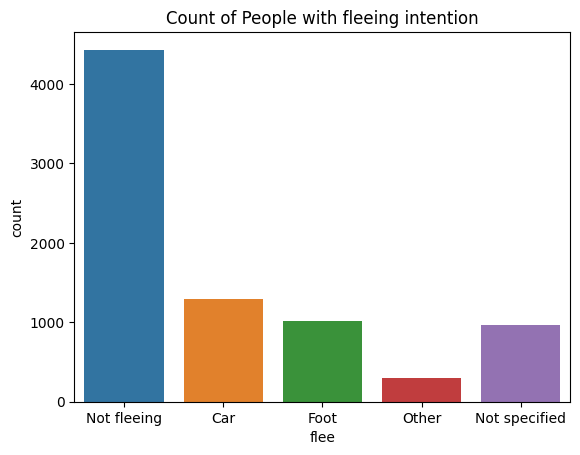

In [34]:
sns.countplot(data=df,x='flee', hue= 'flee')
plt.title("Count of People with fleeing intention")
plt.show()

## Analysis on Body Camera

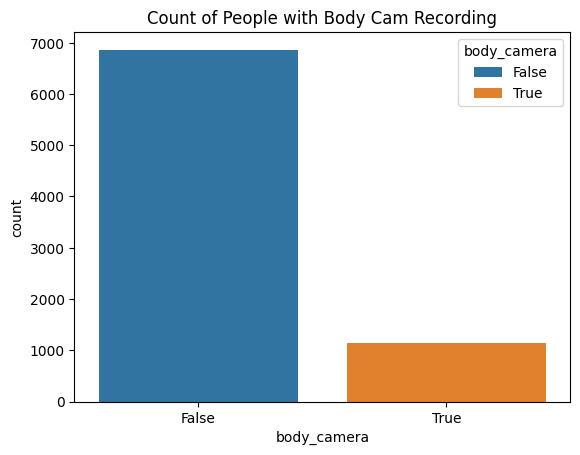

In [35]:
sns.countplot(data=df,x='body_camera',hue = 'body_camera')
plt.title("Count of People with Body Cam Recording")
plt.show()

## Analysis on Armed factor

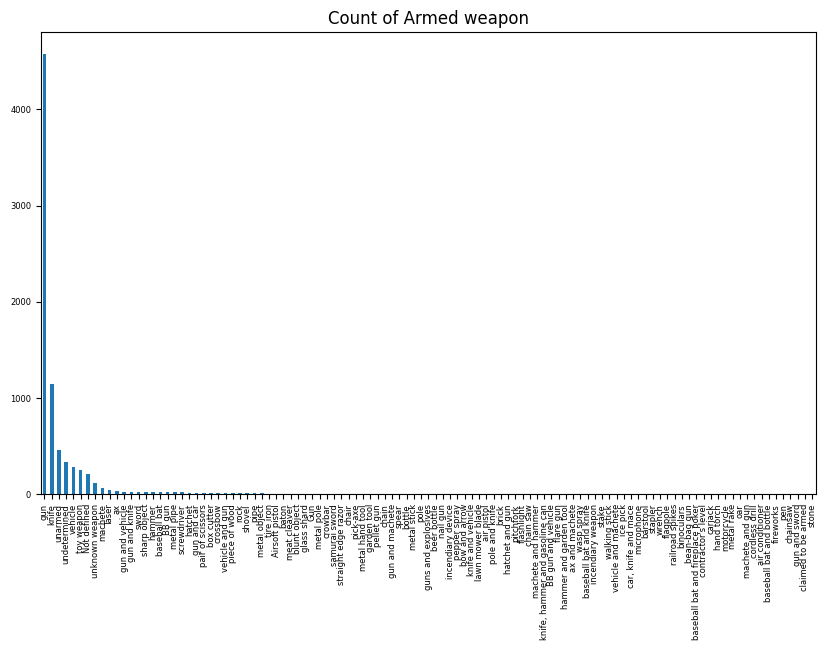

In [36]:
df['armed'].value_counts().plot.bar(fontsize=6, figsize = (10,6))
plt.title("Count of Armed weapon")
plt.ylabel('')
plt.show()

# Model 1: Building a ML Model to Predict the Signs of Mental Illnes of the Suspect 

In [37]:
le = LabelEncoder()
y = le.fit_transform(df["signs_of_mental_illness"])
X = pd.get_dummies(
    df.filter(
        [
            "manner_of_death",
            "armed",
            "flee",
            "threat_level",
            "state",
            "gender",
            "age",
            "city",
            
        ]
    )
)

In [38]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Using KNN Classifier 

In [39]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_train)
acc_score_knn = accuracy_score(y_train,knn_predictions)
acc_score_knn

0.8244024371192001

## Using Logistic Regression

In [40]:
log_reg = LogisticRegression( random_state= 42)
log_reg.set_params(max_iter=600)
log_reg.fit(X_train,y_train)
prediction1 = log_reg.predict(X_train)
acc_score_log_reg = accuracy_score(y_train,prediction1)
acc_score_log_reg

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.8237775347601938

In [41]:
print(classification_report(y_train,prediction1))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      5044
           1       0.79      0.23      0.35      1357

    accuracy                           0.82      6401
   macro avg       0.81      0.61      0.63      6401
weighted avg       0.82      0.82      0.78      6401



## Comparing KNN and LR

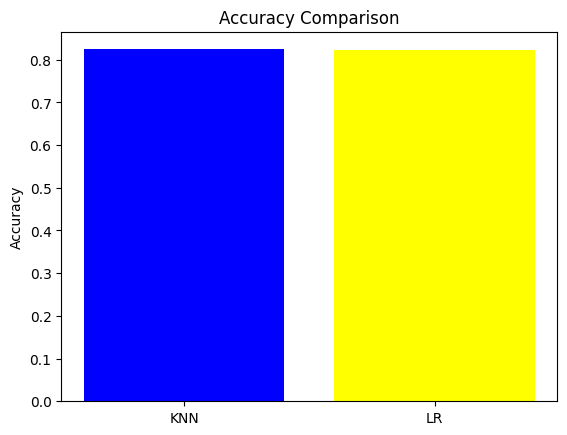

In [42]:
scores = [acc_score_knn, acc_score_log_reg]
model = ['KNN','LR' ]

plt.bar(model, scores, color = ['blue','yellow'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()